## Purpose of Notebook:
This file walks users through Library/Set-up, Install, Data Integrity Checks (using Worcester, MA), a town, two samples, and future implementation for this code.

The City (Worcester) and Town (Norwood) example code should not be ran. They require hefty computations and will likely crash Dask.

To compensate, we run these code examples on two samples of the data, 5 structures located in American Samoa and a random partition.

## Setting up Libraries, S3 client, and Dask Dashboard

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import dask_geopandas as dg
import geopandas as gpd
import utils as ut

### ATTENTION:
User must follow below instructions and replace the AWS access key and secret access key. This is crucial for the analysis to work.

##### Utilizing data from: https://source.coop/repositories/wherobots/usa-structures/description

All data on Source Cooperative, are hosted on AWS S3 bucket. In order to access them, you need credentials that you can generate on Source Cooperative website. Atfer logging in, click on your name at the top right corner, and then click on your username. Then navigate to "Manage" page on the left side. At the bottom of this page you will find a section called "API Keys". If no key has been generated before, generate a new one and then copy the values for each of the following keys, and paste them in the following cell.

source.coop website: https://source.coop/

###### Source: https://github.com/github.com/HamedAlemo/vector-data-tutorial/scalable_vector_analysis.ipynb

In [ ]:
##################################
#   Read Above 'ATTENTION' Note  #
##################################

AWS_ACCESS_KEY_ID = "<YOUR ACCESS KEY>"
AWS_SECRET_ACCESS_KEY = "<YOUR SECRET ACCESS KEY>"

In [3]:
import boto3
s3_client = boto3.client('s3',
                         aws_access_key_id = AWS_ACCESS_KEY_ID,
                         aws_secret_access_key = AWS_SECRET_ACCESS_KEY,
                         endpoint_url='https://data.source.coop'
                        )

In [ ]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
print(client.dashboard_link)

##### Local path for downloading the data

If running the analysis file within the 'saved'//mounted folder and do NOT wish to save the raw data to your computer - delete the
first local_path and uncomment (remove initial #) on the second one. NOTE: you will have to re-install each time you load this image up if you do that.

In [5]:
local_path = "./data/"    # saves data to machine
# local_path = '/home/gisuser/data/'   # deletes data after closing the container

## US Structures Data (Installing all of it)

Change the blocksize value if your computer is stronger. This currently sets each block to 16 Megabytes. More details can be found here (ctrl + f 'blocksize'): https://coderzcolumn.com/tutorials/python/dask-dataframes-guide-to-work-with-large-tabular-datasets

Install time will vary. As of 12/9/2024, the dataset is 10 geoparquets each equating to ~2 Gigabytes. This took ~40 minutes to install on my personal machine: ~ 3 Yr Old Laptop, Windows 11, 16 Gb RAM (Docker is limited to 12 Gb), Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, 2592 Mhz, 6 Core(s), 12 Logical Processor(s)

In [157]:
structure_ddf = ut.get_US_structures_all(s3_client, local_path, blocksize = "16M") # "256M" is regular block size

File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.


In [19]:
structure_ddf.head(3)

geometry  BUILD_ID       OCC_CLS  \
0  MULTIPOLYGON (((-170.8292 -14.32645, -170.8292...     12059  Unclassified   
1  MULTIPOLYGON (((-170.82798 -14.32867, -170.827...     29894  Unclassified   
2  MULTIPOLYGON (((-170.82786 -14.3283, -170.8278...     29886  Unclassified   

       PRIM_OCC SEC_OCC PROP_ADDR PROP_CITY         PROP_ST PROP_ZIP OUTBLDG  \
0  Unclassified    None      None      None  American Samoa     None    None   
1  Unclassified    None      None      None  American Samoa     None    None   
2  Unclassified    None      None      None  American Samoa     None    None   

   ...                USNG   LONGITUDE   LATITUDE              IMAGE_NAME  \
0  ...  02L NK 18412 16164 -170.829258 -14.326434        104001005B4C3F00   
1  ...  02L NK 18540 15909 -170.828069 -14.328742  NOAA Topographic LiDAR   
2  ...  02L NK 18569 15948 -170.827797 -14.328382  NOAA Topographic LiDAR   

   IMAGE_DATE  VAL_METHOD REMARKS                                    UUID  \
0  2020-05-14   Automated    None  {245aca01-8d02-4340-810e-3872ee35e7ef}   
1  2013-01-01  Unverified    None  {a46fac03-1829-47a2-b63f-86d4e52700a8}   
2  2013-01-01  Unverified    None  {4c8bb4a4-86e1-4cb2-908c-a367e7dfa525}   

                                                bbox          geohash  
0  {'xmin': -170.82931163799998, 'ymin': -14.3264...  2jqw2xvymz0vch1  
1  {'xmin': -170.82815531799997, 'ymin': -14.3288...  2jqw2xwc12zkvd0  
2  {'xmin': -170.82790860099996, 'ymin': -14.3284...  2jqw2xwgpg8y3ej  

[3 rows x 29 columns]

##### Notice some columns aren't showing, lets see what they are:

In [7]:
view_middle_columns = structure_ddf.columns[:20]
structure_ddf[view_middle_columns].head(5)

geometry  BUILD_ID       OCC_CLS  \
0  MULTIPOLYGON (((-170.8292 -14.32645, -170.8292...     12059  Unclassified   
1  MULTIPOLYGON (((-170.82798 -14.32867, -170.827...     29894  Unclassified   
2  MULTIPOLYGON (((-170.82786 -14.3283, -170.8278...     29886  Unclassified   
3  MULTIPOLYGON (((-170.82747 -14.32844, -170.827...     29879  Unclassified   
4  MULTIPOLYGON (((-170.82714 -14.32846, -170.827...     29885  Unclassified   

       PRIM_OCC SEC_OCC PROP_ADDR PROP_CITY         PROP_ST PROP_ZIP OUTBLDG  \
0  Unclassified    None      None      None  American Samoa     None    None   
1  Unclassified    None      None      None  American Samoa     None    None   
2  Unclassified    None      None      None  American Samoa     None    None   
3  Unclassified    None      None      None  American Samoa     None    None   
4  Unclassified    None      None      None  American Samoa     None    None   

   HEIGHT    SQMETERS       SQFEET  H_ADJ_ELEV  L_ADJ_ELEV   FIPS  \
0     0.0   59.507576   640.533569         NaN         NaN  60050   
1     0.0  286.000580  3078.481689         NaN         NaN  60050   
2     0.0  204.001236  2195.848877         NaN         NaN  60050   
3     0.0  285.999725  3078.472412         NaN         NaN  60050   
4     0.0   83.999542   904.162659         NaN         NaN  60050   

    CENSUSCODE  PROD_DATE SOURCE                USNG  
0  60050951600 2021-04-09   ORNL  02L NK 18412 16164  
1  60050951600 2013-01-01   NOAA  02L NK 18540 15909  
2  60050951600 2013-01-01   NOAA  02L NK 18569 15948  
3  60050951600 2013-01-01   NOAA  02L NK 18594 15936  
4  60050951600 2013-01-01   NOAA  02L NK 18636 15935

##### We can also further investigate the impacts of blocksize:

In [8]:
partition40 = structure_ddf.partitions[40].compute()
partition40.head(5)

geometry  BUILD_ID      OCC_CLS  \
0  MULTIPOLYGON (((-111.71603 40.37411, -111.7161...   6356322  Residential   
1  MULTIPOLYGON (((-111.7162 40.37468, -111.71619...   6356424  Residential   
2  MULTIPOLYGON (((-111.71587 40.37469, -111.7158...   6356420  Residential   
3  MULTIPOLYGON (((-111.71567 40.37345, -111.7156...   6356164  Residential   
4  MULTIPOLYGON (((-111.71552 40.37399, -111.7155...   6356225  Residential   

                 PRIM_OCC SEC_OCC             PROP_ADDR       PROP_CITY  \
0  Single Family Dwelling    None  1000 NORTH 1050 EAST  PLEASANT GROVE   
1  Single Family Dwelling    None  1053 EAST 1010 NORTH  PLEASANT GROVE   
2  Single Family Dwelling    None  1061 EAST 1010 NORTH  PLEASANT GROVE   
3  Single Family Dwelling    None   933 NORTH 1100 EAST  PLEASANT GROVE   
4  Single Family Dwelling    None   967 NORTH 1100 EAST  PLEASANT GROVE   

  PROP_ST PROP_ZIP OUTBLDG  ...                USNG   LONGITUDE   LATITUDE  \
0    Utah    84062    None  ...  12T VK 39208 69537 -111.716103  40.374204   
1    Utah    84062    None  ...  12T VK 39188 69584 -111.716341  40.374622   
2    Utah    84062    None  ...  12T VK 39218 69584 -111.715985  40.374631   
3    Utah    84062    None  ...  12T VK 39249 69468 -111.715610  40.373586   
4    Utah    84062    None  ...  12T VK 39251 69504 -111.715594  40.373907   

         IMAGE_NAME  IMAGE_DATE VAL_METHOD REMARKS  \
0  105001001D0AA300  2020-05-04  Automated    None   
1  105001001D0AA300  2020-05-04  Automated    None   
2  105001001D0AA300  2020-05-04  Automated    None   
3  105001001D0AA300  2020-05-04  Automated    None   
4  105001001D0AA300  2020-05-04  Automated    None   

                                     UUID  \
0  {94234441-bcf3-4b26-b88b-54b488b7e794}   
1  {ba007b62-1bbe-4538-9d94-ee5a347a3041}   
2  {4ccca22c-7705-4892-8da4-e00cb91d7f80}   
3  {76039646-81e2-4a9d-a77a-70512feb8bac}   
4  {e06859b7-dd6e-42d3-8f92-dcae99305093}   

                                                bbox          geohash  
0  {'xmin': -111.71617885399996, 'ymin': 40.37411...  9x0t9vfuf15vqc3  
1  {'xmin': -111.71650439999996, 'ymin': 40.37456...  9x0t9vfxhrj4g6r  
2  {'xmin': -111.71610170499997, 'ymin': 40.37457...  9x0t9vfzkbsn56z  
3  {'xmin': -111.71566964299996, 'ymin': 40.37345...  9x0t9vg1jwgyz1x  
4  {'xmin': -111.71568185699999, 'ymin': 40.37381...  9x0t9vg5jbccvg3  

[5 rows x 29 columns]

In [9]:
partition40.shape

(873670, 29)

Each partition has 16mb of data, roughly 873,670 rows. This will vary based on the blocksize chosen when calling the ut.get_US_structures_all() function.

## Data Checks (for spatial joins)

#### If you go on to review another state. You may need to re-project the CRS. The following is a good site for visually seeing what the EPSG covers
https://spatialreference.org/ref/epsg/2249/

##### Coordinate Reference System (CRS)
When calculating areas, plotting, performing spatial joins, etc. you will want to set the CRS for your data. This dataframe already has a square footage column, so we do not need to do this, but I will give an example.

The .head() of this dataframe is American Samoa structures. We will create a new filtered dataframe with only those 5 American Samoa structures. Re-project the CRS. Then calculate the areas based on the geometry of each structure. This will be compared to the datasets SQFEET column to understand how picking the right CRS matters.

First, we will check to see if we need to project to a CRS for the first time, or re-project the current one. To check if the data has a CRS, the following code will suffice.

In [10]:
structure_ddf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We will have to re-project for an appropraite EPSG for our area of interest. The entire dataset is in: 4326.

A possible EPSG for American Samoa is 3102
https://epsg.io/3102

In [11]:
american_samoa_ddf = structure_ddf.head(5)

In [12]:
american_samoa_ddf = american_samoa_ddf.to_crs(epsg=3102)

In [13]:
american_samoa_ddf['structure_size'] = american_samoa_ddf.geometry.area

##### Compare with the data's 'SQFEET' column to see if these are similar values

In [14]:
area_columns = american_samoa_ddf.columns[[12, 29]]
american_samoa_ddf[area_columns].head(5)

SQFEET  structure_size
0   640.533569      791.786561
1  3078.481689     3080.954507
2  2195.848877     2197.612614
3  3078.472412     3080.945218
4   904.162659      904.888883

In [15]:
desired_columns = american_samoa_ddf.columns[10:30]
american_samoa_ddf[desired_columns].head(5)

HEIGHT    SQMETERS       SQFEET  H_ADJ_ELEV  L_ADJ_ELEV   FIPS  \
0     0.0   59.507576   640.533569         NaN         NaN  60050   
1     0.0  286.000580  3078.481689         NaN         NaN  60050   
2     0.0  204.001236  2195.848877         NaN         NaN  60050   
3     0.0  285.999725  3078.472412         NaN         NaN  60050   
4     0.0   83.999542   904.162659         NaN         NaN  60050   

    CENSUSCODE  PROD_DATE SOURCE                USNG   LONGITUDE   LATITUDE  \
0  60050951600 2021-04-09   ORNL  02L NK 18412 16164 -170.829258 -14.326434   
1  60050951600 2013-01-01   NOAA  02L NK 18540 15909 -170.828069 -14.328742   
2  60050951600 2013-01-01   NOAA  02L NK 18569 15948 -170.827797 -14.328382   
3  60050951600 2013-01-01   NOAA  02L NK 18594 15936 -170.827566 -14.328497   
4  60050951600 2013-01-01   NOAA  02L NK 18636 15935 -170.827176 -14.328503   

               IMAGE_NAME IMAGE_DATE  VAL_METHOD REMARKS  \
0        104001005B4C3F00 2020-05-14   Automated    None   
1  NOAA Topographic LiDAR 2013-01-01  Unverified    None   
2  NOAA Topographic LiDAR 2013-01-01  Unverified    None   
3  NOAA Topographic LiDAR 2013-01-01  Unverified    None   
4  NOAA Topographic LiDAR 2013-01-01  Unverified    None   

                                     UUID  \
0  {245aca01-8d02-4340-810e-3872ee35e7ef}   
1  {a46fac03-1829-47a2-b63f-86d4e52700a8}   
2  {4c8bb4a4-86e1-4cb2-908c-a367e7dfa525}   
3  {22106c1f-562e-4468-a496-32d407fd8b4f}   
4  {bc01e591-8516-49bf-b66e-dd21667de2f7}   

                                                bbox          geohash  \
0  {'xmin': -170.82931163799998, 'ymin': -14.3264...  2jqw2xvymz0vch1   
1  {'xmin': -170.82815531799997, 'ymin': -14.3288...  2jqw2xwc12zkvd0   
2  {'xmin': -170.82790860099996, 'ymin': -14.3284...  2jqw2xwgpg8y3ej   
3  {'xmin': -170.82767668499997, 'ymin': -14.3286...  2jqw2xx4mn23x0c   
4  {'xmin': -170.82721784799998, 'ymin': -14.3285...  2jqw2xx6qm2znys   

   structure_size  
0      791.786561  
1     3080.954507  
2     2197.612614  
3     3080.945218  
4      904.888883

Scrolling on the above dataframe to compare the 3rd column with the last column, you will notice some values are closer than others. CRS is important, and if we did this same CRS for Utah, we would see completely wrong results. We could also investigate how this dataset calculates the SQFEET column and possibly find the exact CRS that was used for each section.

Moving forward we will utilize the dataframes 'SQFEET' column!

We can also review specific columns that may be valuable, this is shown in the samples section!

### Geometry
Another feature of spatial data that is important is the geometry. The geometry is crucial for any joins or plotting. We detail this in the next section.

## Dataset Integrity

This section shows an example of questions you need to be asking each time you load in a dataset. It is important to verify work so you know the best way to analyze the dataset. Our dataset has columns that specify the state and/or city that a structure is in. However, these columns have blanks as not every structure is identified. For this reason, I want to investigate how many buildings don't get identified.

I will use the city of worcester shapefile from the city government's website. Whenever downloading a shapefile, make sure you get all the other files that come with it: .shp, .cpg, .dbf, .prj, .shx, and .xml

I'll compare the shapefile to 2 different dataframes:

1. The first dataframe will be the entire dataset, no filtering based on columns.

2. The second dataframe will make a dataframe of buildings/rows that are identified as Massachusetts. Then from that dataframe, I will grab a new one for buildings/rows that are identified as Worcester.


Next, I will (try to) compute the number of rows for each spatial join with the Worcester Shapefile. A user can decide if one is 'better' than the other. You also have to consider computational power. If you only lose 100 out of 100,000 buildings, is it worth it to save computational power? I think yes, but it all depends on your analysis and abilities. You will not see the outputs from most '.compute()' lines of code, that is due to a weak computational power on my personal machine. Any computation should be ran with caution, especially those on the entire dataset. I will comment out lines of code that crashed my personal Dask workers, they are likely too large to run on any system but if you've got a super computer then be my guest!

The Worcester Shapefile can be found here: https://opendata.worcesterma.gov/datasets/worcesterma::city-boundary-1/about

Since we are analyzing Massachusetts (City: Worcester, Town: Norwood), and the shapefile we retreived from the City of Worcester was in 2249, we will use 2249.

EPSG:2249 covers both Massachusetts counties we analyze (Worcester and Norfolk), this is in US Survey feet which means we don't need to worry about converting from meters to feet.

In [30]:
massachusetts_ddf = structure_ddf[structure_ddf['PROP_ST'] == 'Massachusetts'] # Filter for Massachusetts buildings
massachusetts_ddf = massachusetts_ddf.to_crs(epsg=2249) # use a CRS that works for Worcester and Norwood
worcester_PROP_CITY_ddf = massachusetts_ddf[massachusetts_ddf['PROP_CITY'] == 'Worcester'] # Filter for Worcester buildings

In [106]:
worcester_boundary = dg.read_file(f"./data/Worcester/City_Boundary.shp", chunksize = 7500) # chunksize specifies number of rows per chunk

##### If the above line of code gave you an error similar to:
'ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/us_structures_analysis/share/proj failed'

Try re-running it

In [34]:
# confirm crs
worcester_boundary.crs

<Projected CRS: EPSG:2249>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [108]:
worcester_boundary.compute() # insight to the shapefile layout.

TOWN  TOWN_ID  TOWNS_ID  POP1980  POP1990  POP2000  POPCH80_90  \
0  WORCESTER      348       261   159843   169759   172648        9916   

   POPCH90_00 TYPE  ISLAND  ... FIPS_PLACE  FIPS_MCD  FIPS_COUNT      ACRES  \
0        2889    C       0  ...      82000  25027030          27  24602.486   

  SQUARE_MIL                              GlobalID  OBJECTID    Shape__Are  \
0    384.411  642fd55c-8273-4e35-993c-d5d0e1eaf706         1  1.071680e+09   

      Shape__Len                                           geometry  
0  139826.751833  POLYGON ((583605.513 2938565.252, 586219.333 2...  

[1 rows x 24 columns]

As noted in the Data Checks section, we must check the geometry files are proper for the join.
The structure_ddf.head(5) line and the above worcester_boundary.compute() will show how the geometry columns are named. The prints confirm they are
the same.

In [36]:
massachusetts_ddf = massachusetts_ddf.set_geometry('geometry')
worcester_boundary = worcester_boundary.set_geometry('geometry')
print(structure_ddf.geometry.name)
print(worcester_boundary.geometry.name)

geometry
geometry


Here we WOULD count the number of rows that each spatial join gives. However, the dataset is still too large! Not advised to run the commented out cell blocks!

##### NOTE: To perform a spatial join, both dataframes must be in the same CRS. We will have to project the entire dataframe to EPSG:2249. If you wish to analyze other areas, you will have to change the CRS again. Keep this in mind!

In [37]:
structure_ddf = structure_ddf.to_crs(epsg=2249)

In [38]:
worcester_entire_ddf = dg.sjoin(structure_ddf, worcester_boundary, how='inner', predicate='within')
# within makes sure the whole structure_ddf row is inside the worcester_boundary
# Understand this approach may mean some of the structure_ddf rows near the boundary won't be included if the shapefile is different by just a little.

worcester_PROP_ddf = dg.sjoin(worcester_PROP_CITY_ddf, worcester_boundary, how='inner', predicate='within')

In [ ]:
# entire_df_worcester_rows = worcester_entire_ddf.count().compute()
# entire_df_worcester_rows

In [ ]:
# filtered_by_columns_worcester_rows = worcester_PROP_ddf.count().compute()
# filtered_by_columns_worcester_rows

##### One last thing we can do is plot our shapely file of Worcester
Dask doesn't have all the plotting features so we will use base geopandas since we know this is just one shapefile.

In [122]:
worcester_df = worcester_boundary.compute()

In [123]:
worcester_geoDF = gpd.GeoDataFrame(worcester_df, geometry='geometry')

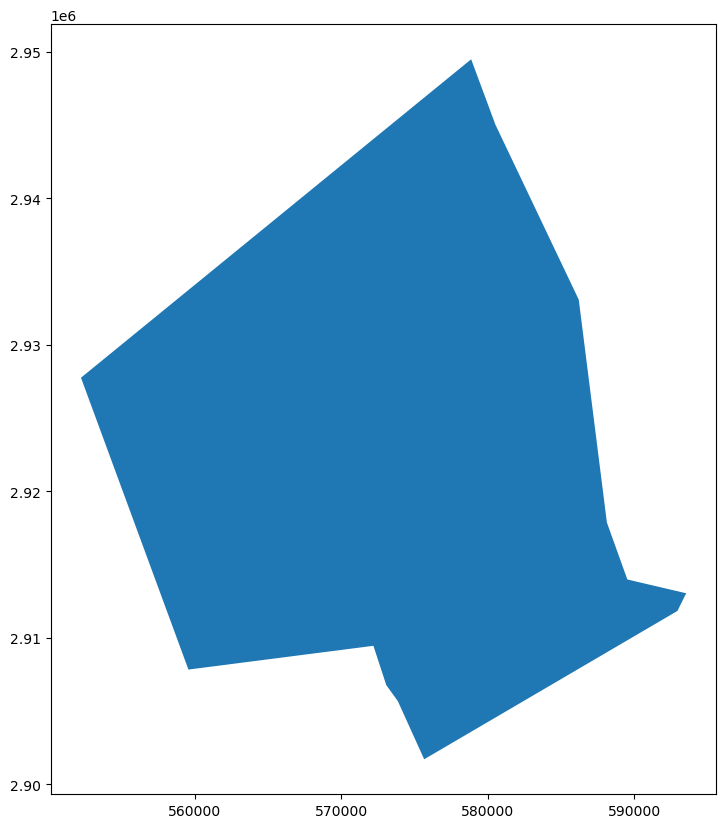

In [124]:
fig, ax = plt.subplots(figsize=(10,10))
worcester_geoDF.plot(ax=ax)
plt.show()

## Town Example

The goal of adding a town example is that it will have less computation requirements than a city. Note: my computer still could not handle this (and Google Colab)! Also, this is relying on filtering dataset by column names, but the zip codes seemed more filled in ('PROP_ZIP') than state or city, so hoping this is sufficient.

User could also grab a shapefile for Norwood, MA and use the original structure_ddf to spatial join with it. Remember: the structure_ddf has already been updated for the CRS, so you will not have to update again (unless picking a region that uses a new CRS)

In [42]:
norwood_ddf = massachusetts_ddf[massachusetts_ddf['PROP_ZIP'] == '02062']

##### Find number of structures in Norwood that are part of dataset (Computing Disclaimer)

In [ ]:
# norwood_ddf.shape[0].compute()

##### Find the average structure size (using dataset's SQFEET column, not the one we created) (Computing Disclaimer)

In [ ]:
# norwood_ddf['SQFEET'].mean().compute()

##### Make a histogram of structure sizes (Computing Disclaimer)

In [ ]:
# sqfeet_data = norwood_ddf['SQFEET']
# norwood_sqfeet = sqfeet_data.compute()


# plt.hist(norwood_sqfeet, bins = 300, edgecolor='black')
# plt.xlabel('Area (in ft^2)')
# plt.ylabel('Frequency')
# plt.title('area_in_square_feet for Norwood Buildings')
# plt.show()

## Using above code examples on the partition40 and american_samoa samples

#### American Samoa

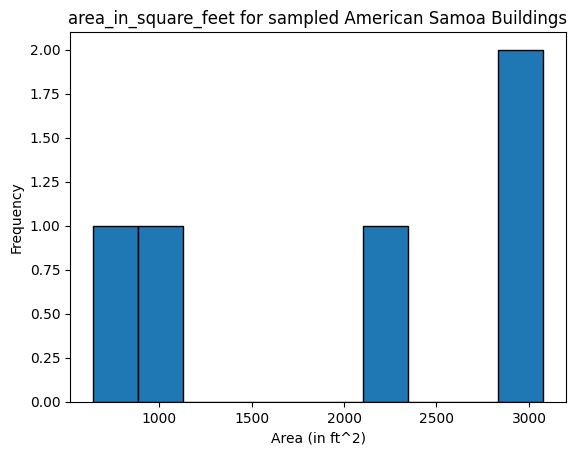

In [51]:
plt.hist(american_samoa_ddf.SQFEET, edgecolor='black')
plt.xlabel('Area (in ft^2)')
plt.ylabel('Frequency')
plt.title('area_in_square_feet for sampled American Samoa Buildings')
plt.show()

In [57]:
# Number of Structures
AmS_totalStructures = american_samoa_ddf.shape[0]
AmS_totalStructures

5

In [59]:
# Average Structure Size
AmS_avgSize = american_samoa_ddf.SQFEET.mean()
AmS_avgSize

1979.5

In [62]:
# Unique Number of Census Blocks
AmS_uniqueBlocks = american_samoa_ddf.CENSUSCODE.nunique()
AmS_uniqueBlocks

1

In [16]:
# Investigate the VAL_METHOD column
AmS_uniqueVAL = american_samoa_ddf['VAL_METHOD'].unique()
AmS_uniqueVAL

array(['Automated', 'Unverified'], dtype=object)

In [27]:
# What if you only want the source of the images to be from NOAA?
AmS_filter = american_samoa_ddf['SOURCE'] == 'NOAA'
AmS_filter
# This isn't very helpful, we can filter the dataset based on this requirement!

0    False
1     True
2     True
3     True
4     True
Name: SOURCE, dtype: bool

In [28]:
AmS_NOAA = american_samoa_ddf[AmS_filter]
AmS_NOAA

geometry  BUILD_ID       OCC_CLS  \
1  MULTIPOLYGON (((207395.778 287403.271, 207395....     29894  Unclassified   
2  MULTIPOLYGON (((207437.092 287540.379, 207458....     29886  Unclassified   
3  MULTIPOLYGON (((207576.415 287489.14, 207557.1...     29879  Unclassified   
4  MULTIPOLYGON (((207695.515 287481.651, 207694....     29885  Unclassified   

       PRIM_OCC SEC_OCC PROP_ADDR PROP_CITY         PROP_ST PROP_ZIP OUTBLDG  \
1  Unclassified    None      None      None  American Samoa     None    None   
2  Unclassified    None      None      None  American Samoa     None    None   
3  Unclassified    None      None      None  American Samoa     None    None   
4  Unclassified    None      None      None  American Samoa     None    None   

   ...   LONGITUDE   LATITUDE              IMAGE_NAME  IMAGE_DATE  VAL_METHOD  \
1  ... -170.828069 -14.328742  NOAA Topographic LiDAR  2013-01-01  Unverified   
2  ... -170.827797 -14.328382  NOAA Topographic LiDAR  2013-01-01  Unverified   
3  ... -170.827566 -14.328497  NOAA Topographic LiDAR  2013-01-01  Unverified   
4  ... -170.827176 -14.328503  NOAA Topographic LiDAR  2013-01-01  Unverified   

  REMARKS                                    UUID  \
1    None  {a46fac03-1829-47a2-b63f-86d4e52700a8}   
2    None  {4c8bb4a4-86e1-4cb2-908c-a367e7dfa525}   
3    None  {22106c1f-562e-4468-a496-32d407fd8b4f}   
4    None  {bc01e591-8516-49bf-b66e-dd21667de2f7}   

                                                bbox          geohash  \
1  {'xmin': -170.82815531799997, 'ymin': -14.3288...  2jqw2xwc12zkvd0   
2  {'xmin': -170.82790860099996, 'ymin': -14.3284...  2jqw2xwgpg8y3ej   
3  {'xmin': -170.82767668499997, 'ymin': -14.3286...  2jqw2xx4mn23x0c   
4  {'xmin': -170.82721784799998, 'ymin': -14.3285...  2jqw2xx6qm2znys   

  structure_size  
1    3080.954507  
2    2197.612614  
3    3080.945218  
4     904.888883  

[4 rows x 30 columns]

#### Partition 40 - Note: if .compute() (or something that performs .compute() such as .head()) has not been called, you will have to add it at the end of each first line of code.

In [22]:
# Number of Structures
p40_totalStructures = partition40.shape[0]
p40_totalStructures

873670

In [23]:
# Average Structure Size
p40_avgSize = partition40['SQFEET'].mean()
p40_avgSize

2687.4016

In [24]:
# Unique Number of Census Blocks
p40_uniqueBlocks = partition40['CENSUSCODE'].nunique()
p40_uniqueBlocks

510

In [30]:
# Investigate the VAL_METHOD column
p40_uniqueVAL = partition40['VAL_METHOD'].unique()
p40_uniqueVAL

array(['Automated', 'Unverified'], dtype=object)

In [31]:
# What if you only want the source of the images to be from NOAA?
p40_NOAA = partition40[partition40['SOURCE'] == 'NOAA']
p40_NOAA # This df has 0 NOAA source imagery

Empty GeoDataFrame
Columns: [geometry, BUILD_ID, OCC_CLS, PRIM_OCC, SEC_OCC, PROP_ADDR, PROP_CITY, PROP_ST, PROP_ZIP, OUTBLDG, HEIGHT, SQMETERS, SQFEET, H_ADJ_ELEV, L_ADJ_ELEV, FIPS, CENSUSCODE, PROD_DATE, SOURCE, USNG, LONGITUDE, LATITUDE, IMAGE_NAME, IMAGE_DATE, VAL_METHOD, REMARKS, UUID, bbox, geohash]
Index: []

[0 rows x 29 columns]

In [32]:
# Lets see what image sources there are for this partition
partition40['SOURCE'].unique()

array(['ORNL', 'NGA'], dtype=object)

If a user wants to compare data with Census data, it will be important to properly filter.

Remember, doing a partition will likely not give the ENTIRE data for that census code. But as seen above, going through the entire dataset isn't quite doable! Just remember all this when drawing comparisons.

In [47]:
# We can do some additional filtering based on the 510 Census Codes we found. Lets get the counts for each code and filter the largest collection
partition40['CENSUSCODE'].value_counts()

CENSUSCODE
49013940600    6499
56023978100    5178
56029965100    5139
49013940300    5109
49047940201    5070
               ... 
30003940400       4
49035101200       3
30003940700       2
08013013602       1
30009000400       1
Name: count, Length: 510, dtype: int64

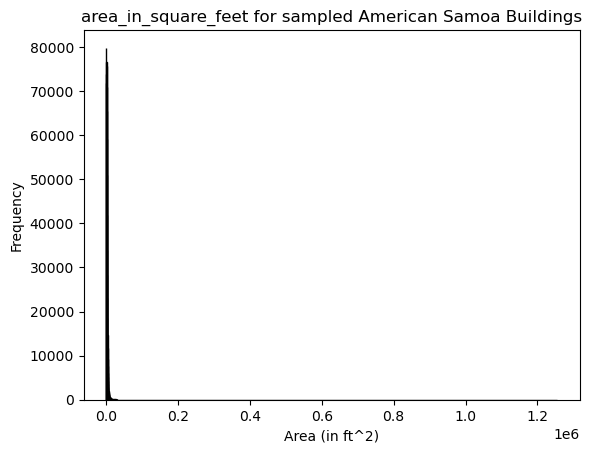

In [64]:
plt.hist(partition40.SQFEET, bins = 5070, edgecolor='black') # bin number is chosen from the value_counts()
plt.xlabel('Area (in ft^2)')
plt.ylabel('Frequency')
plt.title('area_in_square_feet for sampled American Samoa Buildings')
plt.show()

Lets make this plot better!

In [74]:
partition40.SQFEET.max()

1254840.6

We could set the plt.xlim to be (0,1300000) however, since the y-axis is frequency and certain bins have numbers up to 80,000, you can't even see the max sq footage structure. Instead, I slowly decreased the size to have some insight to the area. 

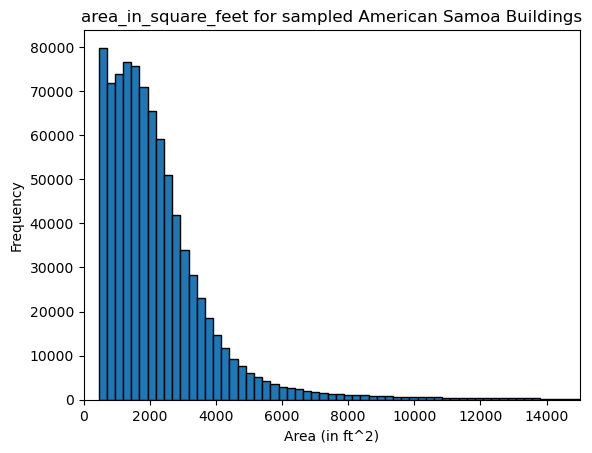

In [80]:
plt.hist(partition40.SQFEET, bins = 5070, edgecolor='black') # bin number is chosen from the value_counts()
plt.xlim(0,15000)
plt.xlabel('Area (in ft^2)')
plt.ylabel('Frequency')
plt.title('area_in_square_feet for sampled American Samoa Buildings')
plt.show()

Picking the 5th census code - 49047940201 - an online search tells this is in Utah. Lets make a new filtered dataframe with only this census code. We should review the data type of the column so we know how to filter it.

In [54]:
print(partition40['CENSUSCODE'].dtype)

object


In [55]:
filtered_utahCode = partition40[partition40['CENSUSCODE'] == '49047940201']
filtered_utahCode.head(5)

geometry  BUILD_ID  \
67330  MULTIPOLYGON (((-109.9751 39.53264, -109.97511...  10427946   
67331  MULTIPOLYGON (((-109.97491 39.53319, -109.9749...  10427991   
67332  MULTIPOLYGON (((-109.975 39.53336, -109.97506 ...  10428026   
67333  MULTIPOLYGON (((-109.97469 39.53327, -109.9746...  10428016   
67334  MULTIPOLYGON (((-109.97453 39.53351, -109.9746...  10428071   

            OCC_CLS      PRIM_OCC SEC_OCC PROP_ADDR PROP_CITY PROP_ST  \
67330  Unclassified  Unclassified    None      None      None    Utah   
67331  Unclassified  Unclassified    None      None      None    Utah   
67332   Residential  Unclassified    None      None      None    Utah   
67333  Unclassified  Unclassified    None      None      None    Utah   
67334  Unclassified  Unclassified    None      None      None    Utah   

      PROP_ZIP OUTBLDG  ...                USNG   LONGITUDE   LATITUDE  \
67330     None    None  ...  12S WJ 88081 76393 -109.975079  39.532686   
67331     None    None  ...  12S WJ 88091 76447 -109.974955  39.533167   
67332     None    None  ...  12S WJ 88082 76468 -109.975058  39.533362   
67333     None    None  ...  12S WJ 88116 76463 -109.974659  39.533317   
67334     None    None  ...  12S WJ 88126 76490 -109.974544  39.533555   

             IMAGE_NAME  IMAGE_DATE VAL_METHOD REMARKS  \
67330  103001006FB7B100  2017-08-20  Automated    None   
67331  103001006FB7B100  2017-08-20  Automated    None   
67332  103001006FB7B100  2017-08-20  Automated    None   
67333  103001006FB7B100  2017-08-20  Automated    None   
67334  103001006FB7B100  2017-08-20  Automated    None   

                                         UUID  \
67330  {a51a101d-e88b-4f2e-a2d6-db2edc7b2e03}   
67331  {95fb8e4a-59ea-4091-b237-4d75399c06f4}   
67332  {d94c435c-ba96-484b-8142-ff766af05bda}   
67333  {b7c4c6d8-5d3e-4092-9556-252adc75fa5a}   
67334  {c2ffa7d1-76f3-4fdf-bd96-c745e7ba52ec}   

                                                    bbox          geohash  
67330  {'xmin': -109.97511224299996, 'ymin': 39.53263...  9x1bckwwdcy46he  
67331  {'xmin': -109.97499716699997, 'ymin': 39.53312...  9x1bcky9mud1xbt  
67332  {'xmin': -109.97511938299999, 'ymin': 39.53331...  9x1bckyde2ubre7  
67333  {'xmin': -109.97468781799995, 'ymin': 39.53327...  9x1bckyfk8r52rq  
67334  {'xmin': -109.97460246399999, 'ymin': 39.53351...  9x1bckygxku15vw  

[5 rows x 29 columns]

In [62]:
middle_columns = filtered_utahCode.columns[10:30]
filtered_utahCode[middle_columns]

HEIGHT   SQMETERS       SQFEET  H_ADJ_ELEV  L_ADJ_ELEV   FIPS  \
67330      0.0  51.996815   559.688538         NaN         NaN  49047   
67331      0.0  44.399349   477.910156         NaN         NaN  49047   
67332      0.0  48.198235   518.800964         NaN         NaN  49047   
67333      0.0  51.997002   559.690552         NaN         NaN  49047   
67334      0.0  61.257107   659.365356         NaN         NaN  49047   
...        ...        ...          ...         ...         ...    ...   
427680     0.0  94.442932  1016.574280         NaN         NaN  49047   
427682     0.0  92.756401   998.420654         NaN         NaN  49047   
427683     0.0  77.240761   831.411804         NaN         NaN  49047   
427698     0.0  56.932507   612.815796         NaN         NaN  49047   
427699     0.0  65.366753   703.601196         NaN         NaN  49047   

         CENSUSCODE  PROD_DATE SOURCE                USNG   LONGITUDE  \
67330   49047940201 2021-04-15   ORNL  12S WJ 88081 76393 -109.975079   
67331   49047940201 2021-04-15   ORNL  12S WJ 88091 76447 -109.974955   
67332   49047940201 2021-04-15   ORNL  12S WJ 88082 76468 -109.975058   
67333   49047940201 2021-04-15   ORNL  12S WJ 88116 76463 -109.974659   
67334   49047940201 2021-04-15   ORNL  12S WJ 88126 76490 -109.974544   
...             ...        ...    ...                 ...         ...   
427680  49047940201 2021-04-15   ORNL  12T XK 46820 53573 -109.274480   
427682  49047940201 2021-04-15   ORNL  12T XK 46195 55269 -109.281432   
427683  49047940201 2021-04-15   ORNL  12T XK 46198 55323 -109.281386   
427698  49047940201 2021-04-15   ORNL  12T XK 58713 46436 -109.136533   
427699  49047940201 2021-04-15   ORNL  12T XK 58722 46434 -109.136431   

         LATITUDE        IMAGE_NAME IMAGE_DATE VAL_METHOD REMARKS  \
67330   39.532686  103001006FB7B100 2017-08-20  Automated    None   
67331   39.533167  103001006FB7B100 2017-08-20  Automated    None   
67332   39.533362  103001006FB7B100 2017-08-20  Automated    None   
67333   39.533317  103001006FB7B100 2017-08-20  Automated    None   
67334   39.533555  103001006FB7B100 2017-08-20  Automated    None   
...           ...               ...        ...        ...     ...   
427680  40.219728  103001006F0C9E00 2017-09-03  Automated    None   
427682  40.235112  103001006F0C9E00 2017-09-03  Automated    None   
427683  40.235603  103001006F0C9E00 2017-09-03  Automated    None   
427698  40.153294  1050010010119800 2018-05-16  Automated    None   
427699  40.153279  1050010010119800 2018-05-16  Automated    None   

                                          UUID  \
67330   {a51a101d-e88b-4f2e-a2d6-db2edc7b2e03}   
67331   {95fb8e4a-59ea-4091-b237-4d75399c06f4}   
67332   {d94c435c-ba96-484b-8142-ff766af05bda}   
67333   {b7c4c6d8-5d3e-4092-9556-252adc75fa5a}   
67334   {c2ffa7d1-76f3-4fdf-bd96-c745e7ba52ec}   
...                                        ...   
427680  {b78f5499-a9b2-4308-af45-f282edc433a1}   
427682  {8af4fcfc-ea50-4286-b374-7f65d6eab030}   
427683  {e6b661f6-5d28-4e8d-b032-cfb8964e4fd9}   
427698  {3a009b56-9a22-41e7-bbb1-6830ca918f15}   
427699  {6ba20394-135d-4658-9ffb-f512d9708757}   

                                                     bbox          geohash  
67330   {'xmin': -109.97511224299996, 'ymin': 39.53263...  9x1bckwwdcy46he  
67331   {'xmin': -109.97499716699997, 'ymin': 39.53312...  9x1bcky9mud1xbt  
67332   {'xmin': -109.97511938299999, 'ymin': 39.53331...  9x1bckyde2ubre7  
67333   {'xmin': -109.97468781799995, 'ymin': 39.53327...  9x1bckyfk8r52rq  
67334   {'xmin': -109.97460246399999, 'ymin': 39.53351...  9x1bckygxku15vw  
...                                                   ...              ...  
427680  {'xmin': -109.27453683699997, 'ymin': 40.21965...  9x4kc3ubbh9wmw1  
427682  {'xmin': -109.28148726199998, 'ymin': 40.23505...  9x4kchxdw0d2tj6  
427683  {'xmin': -109.28146381499994, 'ymin': 40.23556...  9x4kchxtrhh66bz  
427698  {'xmin': -109.13658927599994, 'ymin': 40.15324

In [101]:
filtered_utahCode.geometry

67330     MULTIPOLYGON (((-109.9751 39.53264, -109.97511...
67331     MULTIPOLYGON (((-109.97491 39.53319, -109.9749...
67332     MULTIPOLYGON (((-109.975 39.53336, -109.97506 ...
67333     MULTIPOLYGON (((-109.97469 39.53327, -109.9746...
67334     MULTIPOLYGON (((-109.97453 39.53351, -109.9746...
                                ...                        
427680    MULTIPOLYGON (((-109.27454 40.21979, -109.2744...
427682    MULTIPOLYGON (((-109.28138 40.23516, -109.2814...
427683    MULTIPOLYGON (((-109.28146 40.23558, -109.2814...
427698    MULTIPOLYGON (((-109.13656 40.15334, -109.1364...
427699    MULTIPOLYGON (((-109.13649 40.15324, -109.1364...
Name: geometry, Length: 5070, dtype: geometry

In [144]:
filtered_utahCode.explore()

##### We can also filter the dataset from the building types. The OCC_CLS and PRIM_OCC columns provide the following:

In [151]:
filtered_utahCode.OCC_CLS.unique()

array(['Unclassified', 'Residential', 'Agriculture', 'Government',
       'Commercial', 'Education', 'Industrial', 'Utility and Misc'],
      dtype=object)

In [153]:
filtered_utahCode.PRIM_OCC.unique()

array(['Unclassified', 'Agriculture', 'Single Family Dwelling',
       'Temporary Lodging', 'Multi - Family Dwelling',
       'Emergency Response', 'Manufactured Home', 'Retail Trade',
       'Other Educational Buildings', 'Pre-K - 12 Schools',
       'Colleges/Universities', 'Entertainment and Recreation', 'Light',
       'Professional/Technical Services', 'Wholesale Trade', 'Heavy',
       'Energy Control Monitoring'], dtype=object)

 We can look at buildings tagged as Commercial and Industrial and compare them:

In [159]:
commercial_df = filtered_utahCode[filtered_utahCode['OCC_CLS'] == 'Commercial']
industrial_df = filtered_utahCode[filtered_utahCode['OCC_CLS'] == 'Industrial']

In [162]:
commercial_map = commercial_df.explore(color='blue', tooltip=['SQFEET', 'OCC_CLS']) # Remove tooltip to see entire row data
industrial_map = industrial_df.explore(m=commercial_map, color='red', tooltip=['CENSUSCODE', 'OCC_CLS'])
industrial_map

## Future Implementation - Plotting

The website listed shows a lot of ways that the .explore() feature can be expanded upon. A user could collect shapefiles of census codes and plot each building on top, showing the user clearly which buildings belong to which census block.

https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

## Future Implementation - Downloading within the Docker Container

- Utilize selenium python package and create a function that can go onto Worcester website and download the shapefile

Selenium can auto-scroll, click buttons, etc. for web-scraping purposes. This feature may be best for downloading from census.gov, rather than individual government sites like what was used for the Worcester Shapefile.

## Census Data

Notice the original structure_ddf dataframe has a census block column, 'CENSUSCODE'. This can be used when drawing comparisons. You can also utilize the FIPS as well. Federal Information Processing System (FIPS) Codes for States and Counties. These unique geographic identifiers can allow analyses at the several levels (i.e., countrywide, state, county).

Understanding Census Codes: https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

In [155]:
# Download Process:

#### Create a function to download country wide census data or require user to input several variables. i.e., State, etc.

##### Possible Analyses:
Grab the shapefiles for two census blocks within a city. spatial filter & intersection with the dataset again.

Then review and draw relationships from the data (income, household size, etc.)